# Lab 02 - Data Analysis - 03/03/2020

# A Multivariate data set : Fisher Iris

In [228]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from pylab import *
import math
from scipy import stats

Question 1

In [229]:
iris_df=pd.read_csv("iris.csv")

In [230]:
print(iris_df.head(4))

   sepal_length  sepal_width  petal_length  petal_width
0            51           35            14            2
1            49           30            14            2
2            47           32            13            2
3            46           31            15            2


Question 2 

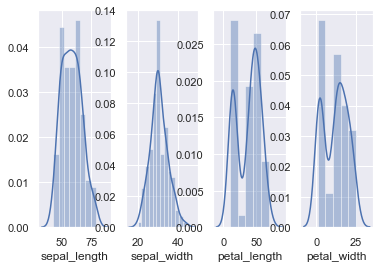

In [231]:
z=1
for col_id in iris_df.columns:
    subplot(1,4,z)
    sns.distplot(iris_df[col_id]);
    z+=1;

On observe qu'il n'y a qu'un seul mode pour les sépales (distribution unimodale) et qu'il y a deux modes pour les pétales (distribution bimodale)

Question 3 

In [232]:
def cov(x,y):
    return (1/len(x))*sum((x-np.mean(x))*(y-np.mean(y)))

In [233]:
def coefcor(x,y):
    return (cov(x,y))/(np.std(x)*np.std(y))

In [234]:
a=coefcor(iris_df["sepal_length"],iris_df["sepal_width"])
a

-0.11756978413300208

In [235]:
b=coefcor(iris_df["sepal_length"],iris_df["petal_length"])
b

0.8717537758865828

In [236]:
c=coefcor(iris_df["sepal_length"],iris_df["petal_width"])
c

0.8179411262715759

In [237]:
d=coefcor(iris_df["sepal_width"],iris_df["petal_length"])
d

-0.4284401043305394

In [238]:
e=coefcor(iris_df["sepal_width"],iris_df["petal_width"])
e

-0.3661259325364391

In [239]:
f=coefcor(iris_df["petal_length"],iris_df["petal_width"])
f

0.9628654314027955

Question 4 

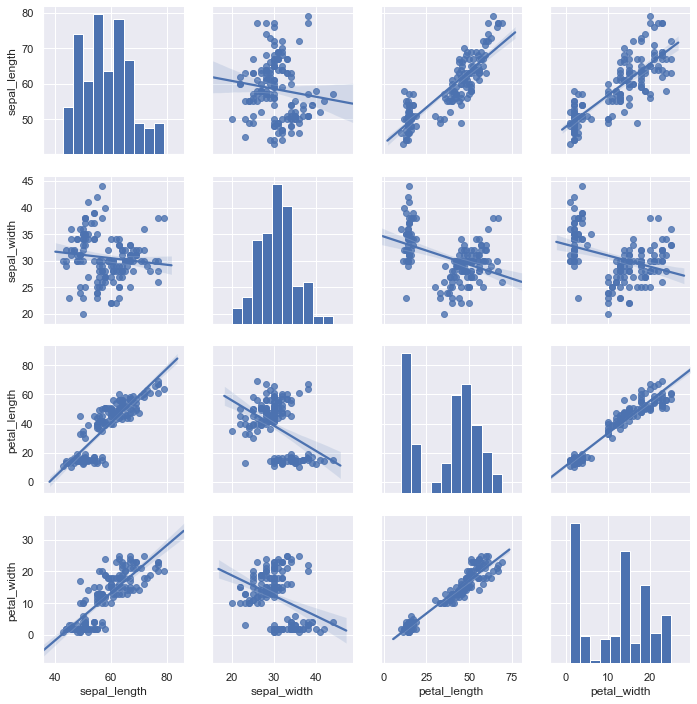

In [240]:
sns.pairplot(iris_df,kind="reg")

On peut observer deux groupes de points a chaque fois, on peut donc supposer qu'il y a deux variétés de fleurs qui existent.

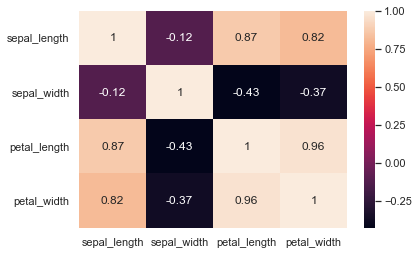

In [241]:
sns.heatmap(iris_df.corr(),annot=True)

Question 5 

In [242]:
def z_(r):
    return ((math.log(1+r)-math.log(1-r))/2)

def s_z(X):
    return (math.sqrt(1/(len(X)-3)))

def z_inf(r,X):
    return (z_(r)-1.96*s_z(X))

def z_supp(r,X):
    return (z_(r)+1.96*s_z(X))

def IC_95(r,X,Y):
    return ((math.exp(2*z_inf(r,X))-1)/(math.exp(2*z_inf(r,X))+1),(math.exp(2*z_supp(r,X))-1)/(math.exp(2*z_supp(r,X))+1))

In [243]:
print(IC_95(a,iris_df["sepal_length"],iris_df["sepal_width"]))
print(IC_95(b,iris_df["sepal_length"],iris_df["petal_length"]))
print(IC_95(c,iris_df["sepal_length"],iris_df["petal_width"]))
print(IC_95(d,iris_df["sepal_width"],iris_df["petal_length"]))
print(IC_95(e,iris_df["sepal_width"],iris_df["petal_width"]))
print(IC_95(f,iris_df["petal_length"],iris_df["petal_width"]))

(-0.272695997514765, 0.04351454845713506)
(0.8270353909500467, 0.905508583674821)
(0.7568958000225467, 0.864836805046326)
(-0.550879123163354, -0.28794720589083156)
(-0.4972152721532231, -0.21869379950170134)
(0.9490521643408231, 0.9729854757049884)


Les coefficients de corrélation trouvés dans la troisième question correspondent avec les intervalles trouvés ci-dessus : ils sont bien inclus dans ces deniers. Nos résultats et nos calculs semblent donc être cohérents.

# B Multivariate data set : Anthropometric data

Question 1  

In [244]:
mansize_df=pd.read_csv("mansize.csv",delimiter=";")

Question 2

In [245]:
mansize_df.describe()

,Age,Height (cm),Weight (kg),Femur Length (cm),Feet Size (cm),Arm span (cm),Hand length (cm),Cranial volume (cm3),Penis size (cm)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,20.447205,173.223602,73.357143,47.516149,24.967702,183.040994,18.885093,1418.105590,13.394410
std,1.676681,12.346546,14.160746,5.210949,2.703530,8.989101,1.247258,49.010535,1.481986
min,18.000000,150.000000,40.000000,37.100000,18.900000,159.600000,15.800000,1298.000000,9.100000
25%,19.000000,165.000000,63.100000,43.600000,23.100000,176.300000,18.200000,1382.000000,12.500000
50%,20.000000,172.000000,71.500000,47.400000,25.100000,181.700000,18.900000,1418.000000,13.400000
75%,22.000000,181.000000,81.100000,51.300000,26.700000,188.900000,19.800000,1450.000000,14.300000
max,24.000000,203.000000,115.200000,62.100000,32.200000,206.900000,22.600000,1558.000000,18.400000


La fonction describe() permet de donner les indicateurs de tendance centrale (moyenne, etc.) et les indicateurs de dispersion (écart-type, premier quartile, etc.) d'une série statistique.

On peut oberserver qu'en général les valeurs sont relativement centrées autour de la moyenne et sont peu dispersées (excepté peut être pour la colonne "Penis Size").

Question 3 

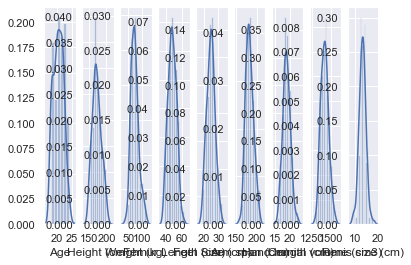

In [246]:
z=1
for col_id in mansize_df.columns:
    subplot(1,9,z)
    sns.distplot(mansize_df[col_id]);
    z+=1;

On observe ici que les distributions sont toutes unimodales (un seul mode).

Question 4 

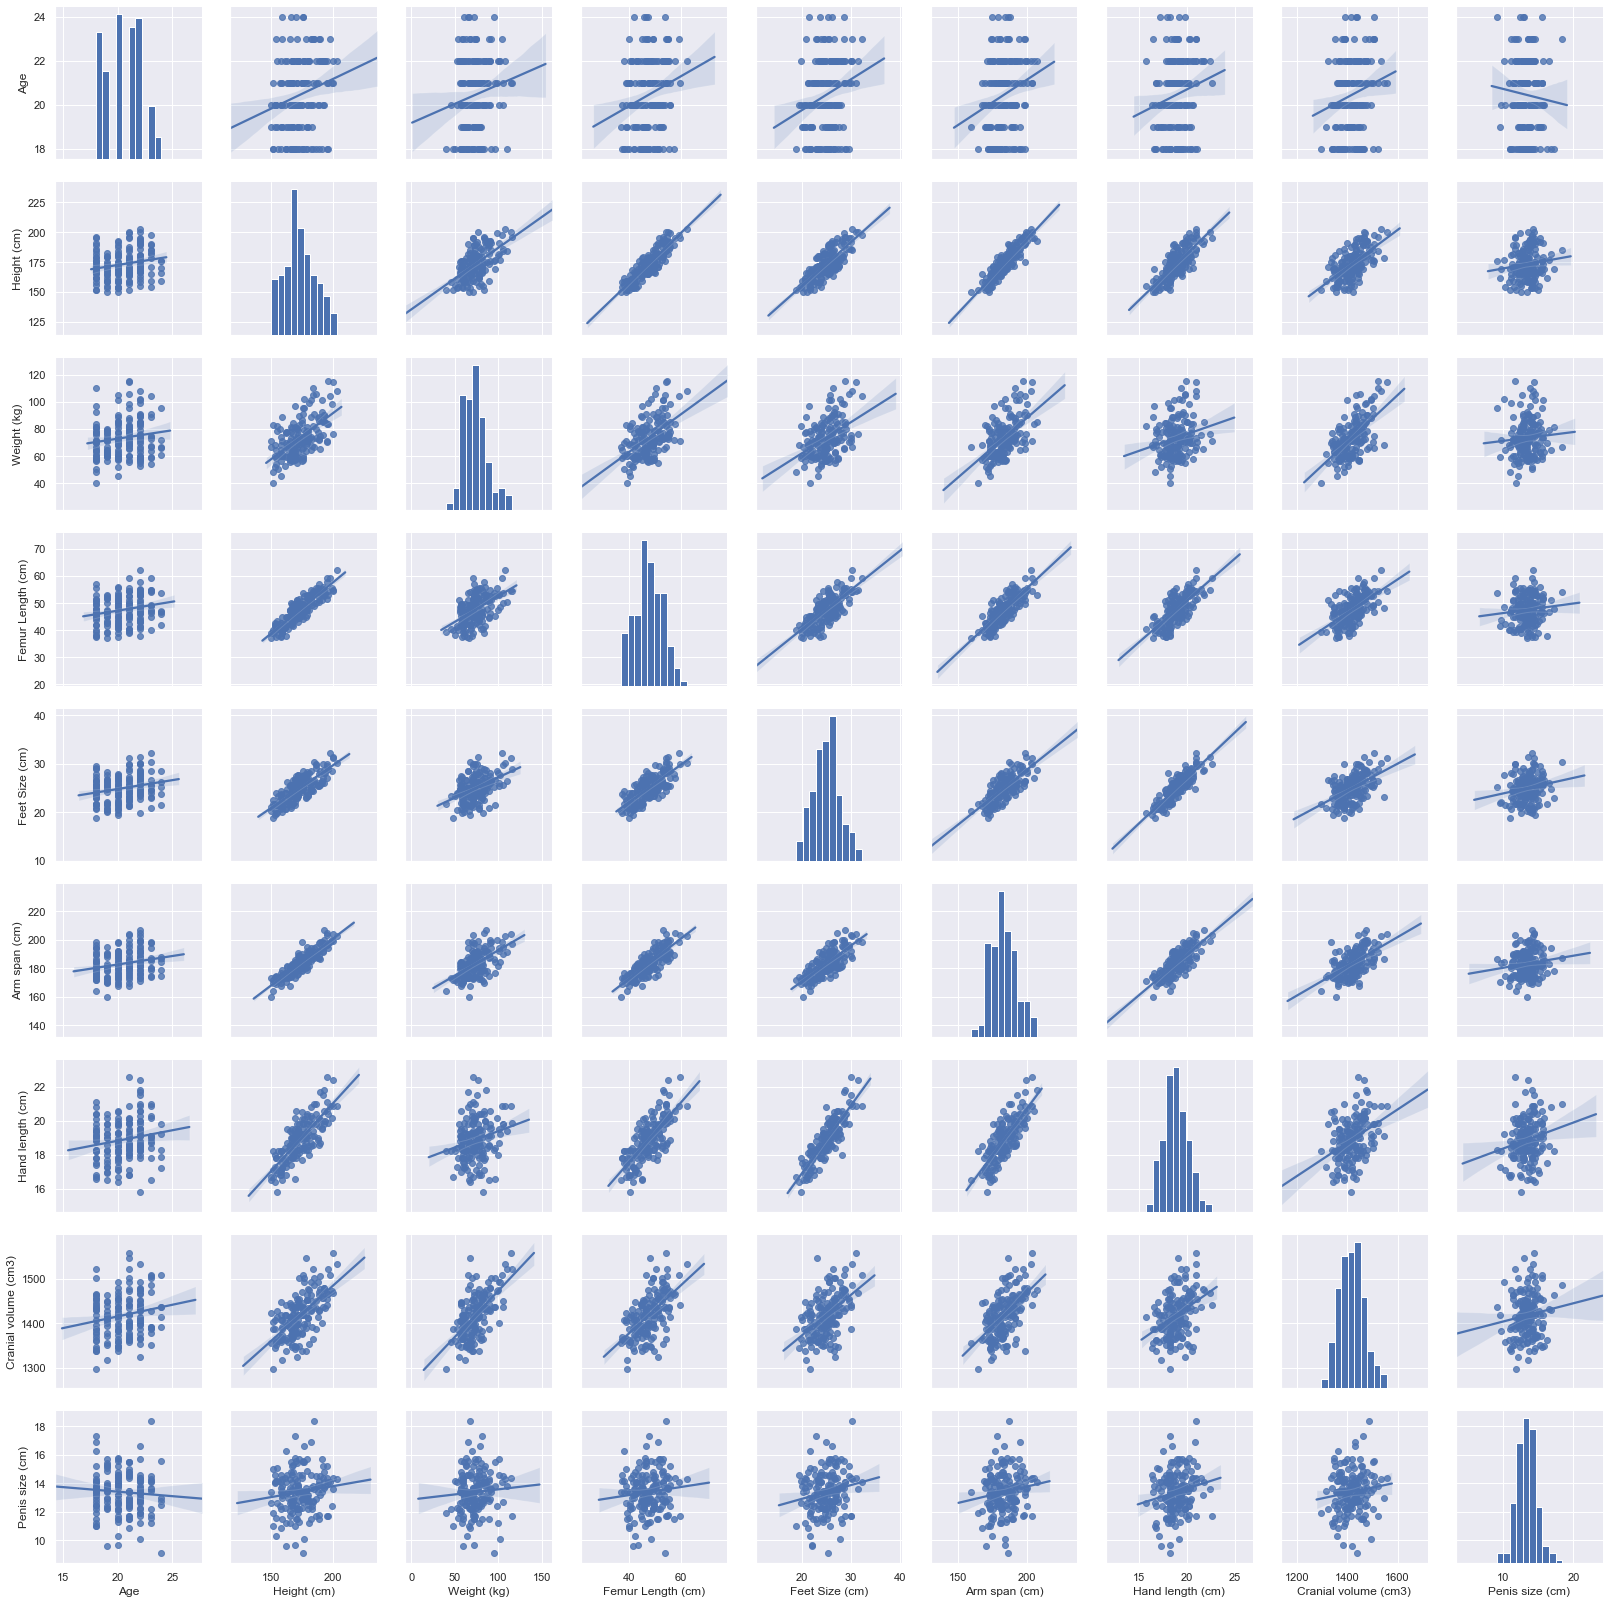

In [247]:
sns.pairplot(mansize_df,kind="reg")

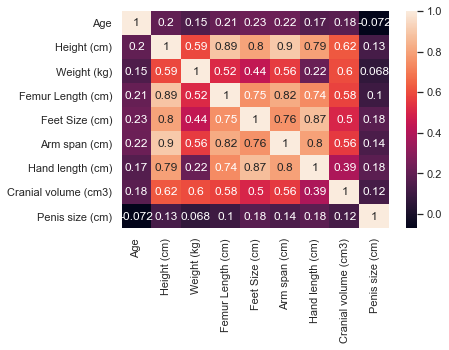

In [248]:
sns.heatmap(mansize_df.corr(),annot=True)

Pour la longueur du fémur et la hauteur d’un individu, on trouve une valeur de 0,89 pour le coefficient de corrélation. Or, 0,89 étant proche de 1, on peut en déduire une corrélation entre les deux variables.
Ainsi, on peut supposer que l’utilisation de la longueur du fémur pour prédire la hauteur d’un individu en archéologie est une bonne méthode.

Question 5 

In [249]:
print(IC_95(coefcor(mansize_df["Age"],mansize_df["Height (cm)"]),mansize_df["Age"],mansize_df["Height (cm)"]))
print(IC_95(coefcor(mansize_df["Age"],mansize_df["Weight (kg)"]),mansize_df["Age"],mansize_df["Weight (kg)"]))
print(IC_95(coefcor(mansize_df["Age"],mansize_df["Femur Length (cm)"]),mansize_df["Age"],mansize_df["Femur Length (cm)"]))
print(IC_95(coefcor(mansize_df["Age"],mansize_df["Feet Size (cm)"]),mansize_df["Age"],mansize_df["Feet Size (cm)"]))

(0.04471809612751605, 0.34222135986287716)
(-0.008058251389486756, 0.2947862978970023)
(0.05984422639573348, 0.3555426782812807)
(0.07464839144446994, 0.3684651506478431)


Les coefficients de corrélation trouvés dans les questions précédentes correspondent avec les intervalles trouvés ci-dessus : ils sont bien inclus dans ces deniers. Nos résultats et nos calculs semblent donc être cohérents.

Question 6 

Grâce aux calculs et analyses précédents, on peut supposer que les variables suivantes sont liées: Height and Femur Length / Height and Feet Size / Height and Arm span / Height and Hand Length / Femur Length and Feet Size / Femur Length and Arm Span / Femur Length and Hand length / Feet Size and Arm Span / Feet Size and Hand Length / Arm Span and Hand Length.

Pour les autres paires de variables, on ne peut pas garantir une corrélation/dépendance entre elles.

# C Chi-squared test of independence and categorial variables

Question 1 

In [250]:
weather_df=pd.read_csv("weather.csv",delimiter=";")

In [251]:
weather_df.describe()

,City,Outlook,Humidity,Temperature
count,193,193,193,193
unique,193,4,3,3
top,Pompei,Sunny,Average,Mild
freq,1,81,82,89


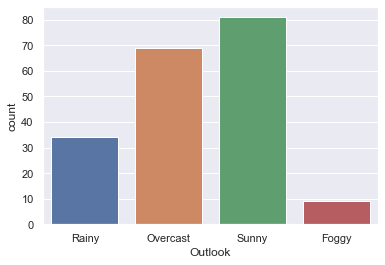

In [252]:
sns.countplot(weather_df["Outlook"])

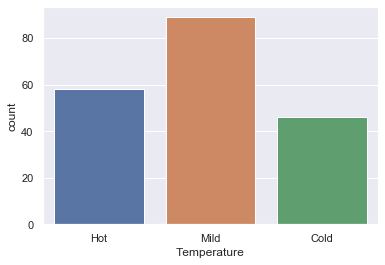

In [253]:
sns.countplot(weather_df["Temperature"])

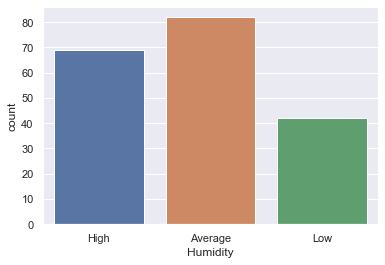

In [254]:
sns.countplot(weather_df["Humidity"])

Question 2 

In [255]:
cross_table = pd.crosstab(weather_df["Outlook"],weather_df["Temperature"])
cross_table

Temperature,Cold,Hot,Mild
Outlook,,,
Foggy,4,3,2
Overcast,19,14,36
Rainy,6,11,17
Sunny,17,30,34


De façon globale, on peut remarquer qu’il y a peu de journées brumeuses par rapport au nombre de journées ensoleillées et qu’il est plus fréquent qu’il pleuve lorsque le temps est brumeux.

Ligne (l) = 4
Colonne (c) = 3
Nb de degrés de liberté = (l-1)x(c-1) = 3x2 = 6 
Il y a a 6 degrés de liberté.

Question 3 

In [256]:
from scipy.stats import chi2_contingency

In [257]:
chi2_contingency(cross_table)

(8.493304645048728,
 0.2041427335538749,
 6,
 array([[ 2.14507772,  2.70466321,  4.15025907],
        [16.44559585, 20.7357513 , 31.81865285],
        [ 8.10362694, 10.21761658, 15.67875648],
        [19.30569948, 24.34196891, 37.35233161]]))

La p-value étant supérieure à 0.05 (0.204 environ), on ne peut pas utiliser Cramer. Ainsi on ne peut pas rejeter l'hypothèse d'indépendance.

Question 4 

Humidity - Outlook :

X2 = 68.48971179065708
p-value = 8.339864804368143e-13
Degrees of freedom = 6

La p-value est inférieure à 0.05 et la forme du cross-table est un rectangle donc on peut utiliser Cramer. On évalue sa valeur à 0.42.
Cette valeur de Cramer étant inférieure à 0.5, on peut conclure qu’un lien de faible dépendance existe entre Humidity et Outlook.

Humidity - Temperature :

X2= 10.330736992441597
p-value = 0.0352101604425817
Degrees of freedom = 4

La p-value est inférieure à 0.05 et la forme du cross-table est un carré donc on peut utiliser Chuprov. On évalue sa valeur à 0.16.
Cette valeur de Chuprov étant inférieure à 0.5, on peut conclure qu’un lien de faible dépendance existe entre Humidity et Temperature.